___
# Projeto 3 - Ciência dos dados
___

Nomes: Edivaldo Rangel, Gabriel Formario, João Pedro Araujo

Dataframes obtidos no link: https://www.kaggle.com/tmdb/tmdb-movie-metadata 

### Temos como objetivo nesse projeto analisar como as informações obtidas na ficha técnica de um filme podem influenciar em seu sucesso financeiro. Ao analisar os dados podemos descobrir quais dessas informações são mais tedenciosas.

### Com a devida análise, poderemos criar um preditor com base nesses dados(diretor, investimento, gênero do filme,etc) e ter uma noção de como ele se sairá financeiramente. Esse modelo preditor poderia ser utilizado por produtoras para ter expectativa de lucro, além de poder guiar novas produtoras em que tipo de equipe e gênero investir para uma maior garantia de sucesso.

# Predição de sucesso de um filme.

## Análise exploratória

In [1]:
%matplotlib notebook
%reset -f


import pandas as pd
import numpy as np
from scipy.stats import norm, probplot
import statsmodels.api as sm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import preprocessing


In [2]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [3]:
filme = pd.read_csv("tmdb_5000_movies.csv")
creditos = pd.read_csv("tmdb_5000_credits.csv")

In [4]:
filme
filme2= filme.drop_duplicates(subset='title',keep=False)

In [42]:
data = filme2.set_index('title').join(creditos.set_index('title'))
data.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'vote_average', 'vote_count',
       'movie_id', 'cast', 'crew'],
      dtype='object')

In [6]:
data

In [39]:
data.describe()

budget             id   popularity       revenue      runtime  \
count  4.797000e+03    4797.000000  4797.000000  4.797000e+03  4795.000000   
mean   2.906232e+07   57210.509485    21.492938  8.224613e+07   106.869447   
std    4.074008e+07   88735.919350    31.829961  1.628764e+08    22.621352   
min    0.000000e+00       5.000000     0.000000  0.000000e+00     0.000000   
25%    8.000000e+05    9021.000000     4.668910  0.000000e+00    94.000000   
50%    1.500000e+07   14631.000000    12.921594  1.917000e+07   103.000000   
75%    4.000000e+07   58626.000000    28.276480  9.292120e+07   117.000000   
max    3.800000e+08  459488.000000   875.581305  2.787965e+09   338.000000   

       vote_average    vote_count       movie_id  Thriller  Romance   Drama  \
count   4797.000000   4797.000000    4797.000000    4797.0   4797.0  4797.0   
mean       6.091828    690.104023   57210.509485       1.0      1.0     1.0   
std        1.195237   1234.985528   88735.919350       0.0      0.0     0.0   
min        0.000000      0.000000       5.000000       1.0      1.0     1.0   
25%        5.600000     54.000000    9021.000000       1.0      1.0     1.0   
50%        6.200000    235.000000   14631.000000       1.0      1.0     1.0   
75%        6.800000    737.000000   58626.000000       1.0      1.0     1.0   
max       10.000000  13752.000000  459488.000000       1.0      1.0     1.0   

       Family  History     War  Comedy   Music   Crime  Science Fiction  \
count  4797.0   4797.0  4797.0  4797.0  4797.0  4797.0           4797.0   
mean      1.0      1.0     1.0     1.0     1.0     1.0              1.0   
std       0.0      0.0     0.0     0.0     0.0     0.0              0.0   
min       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
25%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
50%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
75%       1.0      1.0     1.0     1.0     1.0     1.0              1.0   
max       1.0      1.0     1.0     1.0     1.0     1.0              1.0   

       Adventure  Documentary  Action  Mystery  Western  Fantasy  Horror  \
count     4797.0       4797.0  4797.0   4797.0   4797.0   4797.0  4797.0   
mean         1.0          1.0     1.0      1.0      1.0      1.0     1.0   
std          0.0          0.0     0.0      0.0      0.0      0.0     0.0   
min          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
25%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
50%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
75%          1.0          1.0     1.0      1.0      1.0      1.0     1.0   
max          1.0          1.0     1.0      1.0      1.0      1.0     1.0   

       TV Movie  Foreign  Animation  
count    4797.0   4797.0     4797.0  
mean        1.0      1.0        1.0  
std         0.0      0.0        0.0  
min         1.0      1.0        1.0  
25%         1.0      1.0        1.0  
50%         1.0      1.0        1.0  
75%         1.0      1.0        1.0  
max         1.0      1.0        1.0

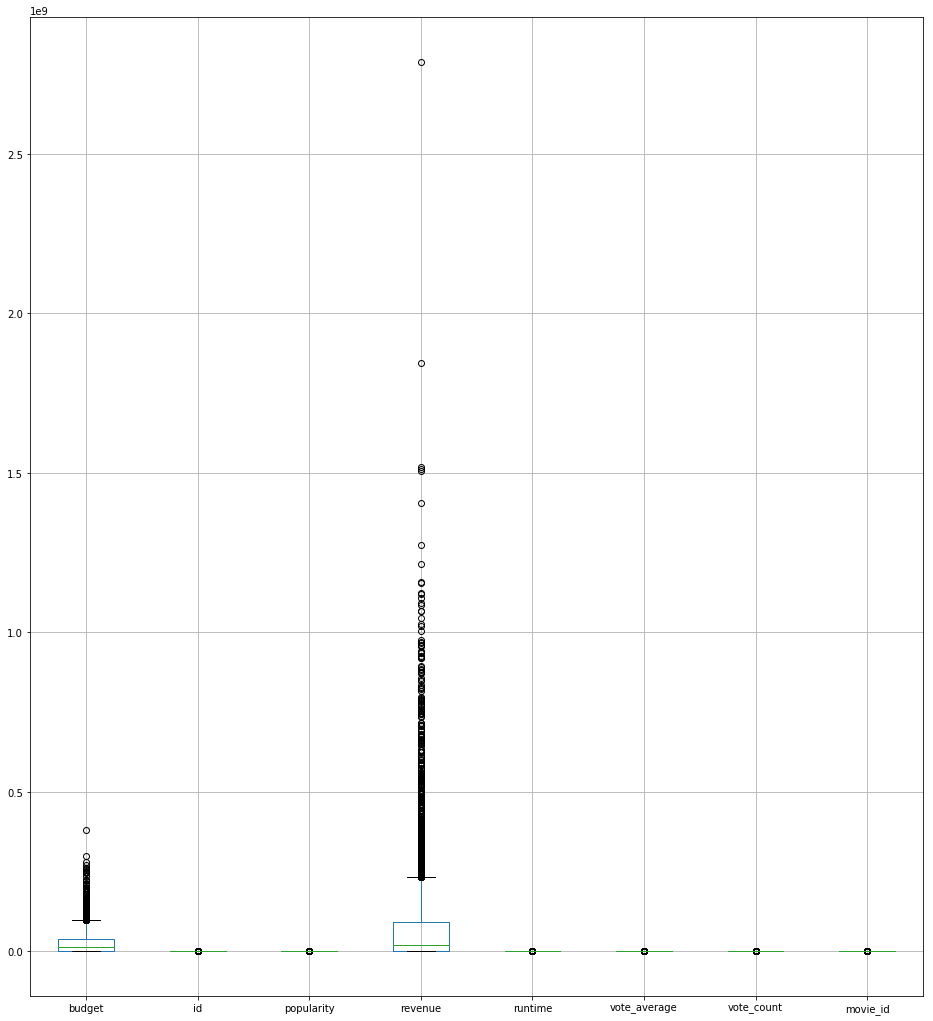

In [44]:
data.boxplot(figsize = (16,18));

In [45]:
rendimento = data.set_index("revenue")

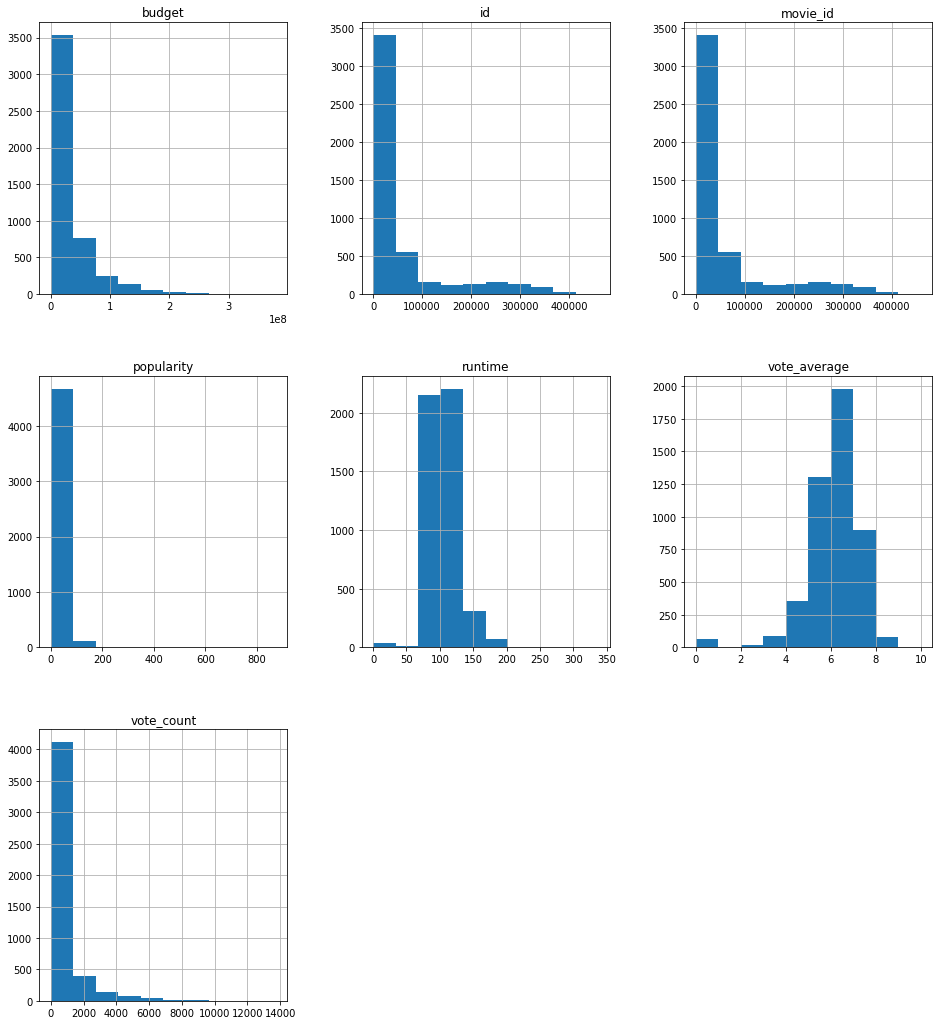

In [47]:
rendimento.hist(figsize = (16,18));

## Dummyfied para gêneros

In [7]:
dados_genero = []
for dado in range(len(data.genres)):
    dados_genero.append(data.genres.iloc[dado])
    
    
    
nomes_genero = []
for genero in dados_genero:
    for nome in eval(genero):
        nomes_genero.append(nome["name"])
        
    data[nome["name"]] = 1

lista_generos = list(dict.fromkeys(nomes_genero))
lista_generos


['Drama',
 'Mystery',
 'Horror',
 'Thriller',
 'Comedy',
 'Romance',
 'Science Fiction',
 'Family',
 'Action',
 'Crime',
 'Adventure',
 'History',
 'Fantasy',
 'War',
 'Music',
 'Documentary',
 'Western',
 'Animation',
 'TV Movie',
 'Foreign']

In [8]:
copia = data.copy()

In [9]:
for genero in lista_generos:
    copia[genero] = 0

In [10]:
copia.head(450)

budget  \
title                                                  
#Horror                                      1500000   
(500) Days of Summer                         7500000   
10 Cloverfield Lane                         15000000   
10 Days in a Madhouse                        1200000   
10 Things I Hate About You                  16000000   
102 Dalmatians                              85000000   
10th & Wolf                                  8000000   
11:14                                        6000000   
12 Angry Men                                  350000   
12 Rounds                                   20000000   
12 Years a Slave                            20000000   
127 Hours                                   18000000   
13 Going on 30                              37000000   
13 Hours: The Secret Soldiers of Benghazi   50000000   
1408                                        25000000   
15 Minutes                                  60000000   
16 Blocks                                   55000000   
16 to Life                                         0   
17 Again                                    20000000   
1776                                               0   
1911                                        30000000   
1941                                        35000000   
1982                                         1000000   
2 Fast 2 Furious                            76000000   
2 Guns                                      61000000   
20 Dates                                           0   
20 Feet from Stardom                         1000000   
20,000 Leagues Under the Sea                 5000000   
200 Cigarettes                               6000000   
2001: A Space Odyssey                       10500000   
...                                              ...   
Banshee Chapter                               950000   
Barbarella                                   9000000   
Barbecue                                     6000000   
Barbershop                                  12000000   
Barbershop 2:  Back in Business             18000000   
Barney's Great Adventure                           0   
Barney's Version                            30000000   
Barnyard                                    51000000   
Barry Lyndon                                11000000   
Barry Munday                                       0   
Basic                                       50000000   
Basic Instinct 2                            70000000   
Basquiat                                     2962051   
Bathing Beauty                               2361000   
Bathory: Countess of Blood                         0   
Batman & Robin                             125000000   
Batman Begins                              150000000   
Batman Forever                             100000000   
Batman Returns                              80000000   
Batman v Superman: Dawn of Justice         250000000   
Batman: The Dark Knight Returns, Part 2      3500000   
Bats                                               0   
Battle for the Planet of the Apes            1700000   
Battle of the Year                          20000000   
Battle: Los Angeles                         70000000   
Battlefield Earth                           44000000   
Battleship                                 209000000   
Be Cool                                     53000000   
Be Kind Rewind                                     0   
Beastly                                     17000000   

                                                                                      genres  \
title                                                                                          
#Horror                                    [{"id": 18, "name": "Drama"}, {"id": 9648, "na...   
(500) Days of Summer                       [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
10 Cloverfield Lane                        [{"id": 53, "name": "Thriller"}, {"id": 878, "...   
10 Days in a Madhouse                

In [11]:
for i in copia.index:
    gen = eval(copia.loc[i,"genres"])
    for l in gen:
        copia.loc[i,l['name']]=1
        
    

In [12]:
copia

budget  \
title                                                 
#Horror                                     1500000   
(500) Days of Summer                        7500000   
10 Cloverfield Lane                        15000000   
10 Days in a Madhouse                       1200000   
10 Things I Hate About You                 16000000   
102 Dalmatians                             85000000   
10th & Wolf                                 8000000   
11:14                                       6000000   
12 Angry Men                                 350000   
12 Rounds                                  20000000   
12 Years a Slave                           20000000   
127 Hours                                  18000000   
13 Going on 30                             37000000   
13 Hours: The Secret Soldiers of Benghazi  50000000   
1408                                       25000000   
15 Minutes                                 60000000   
16 Blocks                                  55000000   
16 to Life                                        0   
17 Again                                   20000000   
1776                                              0   
1911                                       30000000   
1941                                       35000000   
1982                                        1000000   
2 Fast 2 Furious                           76000000   
2 Guns                                     61000000   
20 Dates                                          0   
20 Feet from Stardom                        1000000   
20,000 Leagues Under the Sea                5000000   
200 Cigarettes                              6000000   
2001: A Space Odyssey                      10500000   
...                                             ...   
Young Adult                                12000000   
Young Frankenstein                          2800000   
Young Guns                                 13000000   
Young Sherlock Holmes                      18000000   
Your Highness                              49900000   
Your Sister's Sister                         125000   
Yours, Mine and Ours                              0   
Youth in Revolt                            18000000   
Z Storm                                           0   
ZMD: Zombies of Mass Destruction                  0   
Zack and Miri Make a Porno                 24000000   
Zambezia                                   20000000   
Zathura: A Space Adventure                 65000000   
Zero Dark Thirty                           40000000   
Zero Effect                                 5000000   
Zipper                                            0   
Zodiac                                     65000000   
Zombie Hunter                                     0   
Zombieland                                 23600000   
Zookeeper                                  80000000   
Zoolander                                  28000000   
Zoolander 2                                50000000   
Zoom                                       35000000   
Zulu                                       16000000   
[REC]                                       1500000   
[REC]²                                      5600000   
eXistenZ                                   15000000   
xXx                                        70000000   
xXx: State of the Union                    60000000   
Æon Flux                                   62000000   

                                                                                      genres  \
title                                                                                          
#Horror                                    [{"id": 18, "name": "Drama"}, {"id": 9648, "na...   
(500) Days of Summer                       [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
10 Cloverfield Lane                        [{"id": 53, "name": "Thriller"}, {"id": 878, "...   
10 Days in a Madhouse                                          [{"id": 18, "name": "Drama"}]   
10 

## Dummyfied para diretores

In [13]:
q = data.crew.iloc[338]
for l in eval(q):
    print(l)

{'credit_id': '5564a9c6c3a368072f00208f', 'department': 'Art', 'gender': 2, 'id': 5508, 'job': 'Production Design', 'name': 'Nelson Coates'}
{'credit_id': '5564a8c29251410608001a6d', 'department': 'Camera', 'gender': 2, 'id': 31856, 'job': 'Director of Photography', 'name': 'Brian J. Breheny'}
{'credit_id': '5564a8e59251414222002010', 'department': 'Production', 'gender': 1, 'id': 33437, 'job': 'Producer', 'name': 'Susan Cartsonis'}
{'credit_id': '5564a8ad92514141c7001e28', 'department': 'Sound', 'gender': 2, 'id': 37757, 'job': 'Original Music Composer', 'name': 'David Hirschfelder'}
{'credit_id': '52fe45d59251416c7506413d', 'department': 'Writing', 'gender': 1, 'id': 51680, 'job': 'Novel', 'name': 'Alice Hoffman'}
{'credit_id': '52fe45d59251416c75064137', 'department': 'Writing', 'gender': 1, 'id': 53014, 'job': 'Screenplay', 'name': 'Jessica Bendinger'}
{'credit_id': '52fe45d59251416c75064131', 'department': 'Writing', 'gender': 2, 'id': 63716, 'job': 'Screenplay', 'name': 'John Qua

In [14]:
s = []
for k in range(len(copia.crew)):
    s.append(data.crew.iloc[k])
print(s[0])

[{"credit_id": "545bbac70e0a261fb6002329", "department": "Writing", "gender": 1, "id": 61111, "job": "Screenplay", "name": "Tara Subkoff"}, {"credit_id": "545bbabf0e0a261fb9002212", "department": "Directing", "gender": 1, "id": 61111, "job": "Director", "name": "Tara Subkoff"}, {"credit_id": "545bbae4c3a36853500018a8", "department": "Production", "gender": 1, "id": 61111, "job": "Producer", "name": "Tara Subkoff"}, {"credit_id": "545bbad3c3a3685358001b92", "department": "Production", "gender": 0, "id": 1382445, "job": "Producer", "name": "Jason Ludman"}, {"credit_id": "545bbadbc3a368535d001e74", "department": "Production", "gender": 0, "id": 1382446, "job": "Producer", "name": "Oren Segal"}, {"credit_id": "545bbaf3c3a3685358001b9d", "department": "Production", "gender": 0, "id": 1382448, "job": "Producer", "name": "Brendan Walsh"}]


In [15]:
lista_diretor = []
for k in copia['crew']:
    for m in eval(k):
        if m['job'] == 'Director':
            lista_diretor.append(m['name'])

lista_diretor = set(lista_diretor)
lista_diretor

{'Vivek Agnihotri',
 'Bob Giraldi',
 'Mora Stephens',
 'Stephen Norrington',
 'Steve Carr',
 'Michael Cimino',
 'Sam Fell',
 'Olatunde Osunsanmi',
 'Coky Giedroyc',
 'Dewey Nicks',
 'Darrell James Roodt',
 'Troy Duffy',
 'Tony Richardson',
 'Ning Hao',
 'Jeff Burr',
 'Thomas L. Phillips',
 'Jonathan Dayton',
 'Brian Baugh',
 'Tommy Lee Jones',
 'Mervyn LeRoy',
 'Joachim Rønning',
 'Greg Strause',
 'John Erick Dowdle',
 'Josh Trank',
 'Bong Joon-ho',
 'Gideon Raff',
 'Joseph L. Mankiewicz',
 'Ossie Davis',
 'Cary Bell',
 'Stephen Carpenter',
 'Peyton Reed',
 'Antonio Simoncini',
 'Jehane Noujaim',
 'James Bidgood',
 'Eugenio Derbez',
 'Stephen Langford',
 'Fede Alvarez',
 'Floria Sigismondi',
 'Boris Rodriguez',
 'René Féret',
 'Richard Wallace',
 'Matt Williams',
 'Marc Schölermann',
 'Anonymous',
 'Troy Miller',
 'Peter Hastings',
 'Nicholas Meyer',
 'Drake Doremus',
 'Lee Toland Krieger',
 'Victor Teran',
 'Phil Lord',
 'Thomas Lilti',
 'Dan Ireland',
 'Edgar Wright',
 'Bruno Podalyd

In [16]:
for dire in lista_diretor:
    copia[dire] = 0

In [17]:
eval(copia.loc['#Horror',"crew"])[0]

{'credit_id': '545bbac70e0a261fb6002329',
 'department': 'Writing',
 'gender': 1,
 'id': 61111,
 'job': 'Screenplay',
 'name': 'Tara Subkoff'}

In [18]:

def diretor (filme):
    for k in eval(copia.loc[filme,"crew"]):
        if k['job'] == 'Director':
            return k['name']

In [19]:
diretor('#Horror')

'Tara Subkoff'

In [21]:
for dire in lista_diretor:
    copia[dire] = 0

In [22]:
for z in copia.index:
    copia.loc[z, diretor(z)] = 1


In [23]:
copia.loc["#Horror", diretor("#Horror")] 

1

In [27]:
copia

budget  \
title                                                  
#Horror                                      1500000   
(500) Days of Summer                         7500000   
10 Cloverfield Lane                         15000000   
10 Days in a Madhouse                        1200000   
10 Things I Hate About You                  16000000   
102 Dalmatians                              85000000   
10th & Wolf                                  8000000   
11:14                                        6000000   
12 Angry Men                                  350000   
12 Rounds                                   20000000   
12 Years a Slave                            20000000   
127 Hours                                   18000000   
13 Going on 30                              37000000   
13 Hours: The Secret Soldiers of Benghazi   50000000   
1408                                        25000000   
15 Minutes                                  60000000   
16 Blocks                                   55000000   
16 to Life                                         0   
17 Again                                    20000000   
1776                                               0   
1911                                        30000000   
1941                                        35000000   
1982                                         1000000   
2 Fast 2 Furious                            76000000   
2 Guns                                      61000000   
20 Dates                                           0   
20 Feet from Stardom                         1000000   
20,000 Leagues Under the Sea                 5000000   
200 Cigarettes                               6000000   
2001: A Space Odyssey                       10500000   
2012                                       200000000   
2016: Obama's America                        2500000   
2046                                        12000000   
21                                          35000000   
21 & Over                                   13000000   
21 Grams                                    20000000   
21 Jump Street                              42000000   
22 Jump Street                              50000000   
24 7: Twenty Four Seven                            0   
25th Hour                                   15000000   
27 Dresses                                  30000000   
28 Days                                     43000000   
28 Days Later                                5000000   
28 Weeks Later                              15000000   
2:13                                         3500000   
3 Backyards                                        0   
3 Days to Kill                              28000000   
3 Ninjas Kick Back                                 0   
3 Strikes                                    6000000   
30 Days of Night                            30000000   
...                                              ...   
X2                                         110000000   
Y Tu Mamá También                            5000000   
Year One                                    60000000   
Yeh Jawaani Hai Deewani                      7700000   
Yentl                                       12000000   
Yes                                                0   
Yes Man                                     70000000   
Yesterday Was a Lie                                0   
Yoga Hosers                                  5000000   
Yogi Bear                                   80000000   
You Again                                   20000000   
You Can Count on Me                                0   
You Can't Take It With You                   1644736   
You Don't Mess with the Zohan               90000000   
You Got Served                                     0   
You Kill Me                                  4000000   
You Only Live Twice                          9500000   
You Will Meet a Tall Dark Stranger          22000000   
You've Got Mail                             65000000   
You, Me and Du

In [59]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 100)
copia.dropna(axis='columns', inplace=True)


## Seperação entre teste e treino

In [55]:
# Separa X e Y teste

In [56]:
from sklearn import datasets, linear_model
from matplotlib import pyplot as plt

In [57]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(copia, test_size=0.2)

In [58]:
train

budget  \
title                                                   
Life or Something Like It                    40000000   
Thor: The Dark World                        170000000   
Heroes of Dirt                                      0   
Animals United                                      0   
Taken                                        25000000   
The Lake House                               40000000   
Can't Hardly Wait                            10000000   
Saints and Soldiers                            780000   
The Greatest Show on Earth                    4000000   
Psycho                                         806948   
Casablanca                                     878000   
Ratatouille                                 150000000   
Memento                                       9000000   
The Masked Saint                                    0   
Scott Pilgrim vs. the World                  60000000   
Before Sunset                                 2700000   
The Station Agent                              500000   
American Dreamz                              17000000   
Trainspotting                                 4000000   
Wild Grass                                          0   
Christmas Eve                                       0   
Deep Rising                                  45000000   
The Life Aquatic with Steve Zissou           50000000   
Bullets Over Broadway                               0   
The Four Feathers                            35000000   
Rudderless                                    5000000   
The Switch                                   19000000   
Bad Grandpa                                  15000000   
The Original Kings of Comedy                        0   
Private Benjamin                                    0   
Julia                                               0   
Princess Mononoke                            26500000   
Pan                                         150000000   
The Messenger: The Story of Joan of Arc      60000000   
The Blue Room                                       0   
Guess Who                                    35000000   
Tangled                                     260000000   
Pink Flamingos                                  12000   
History of the World: Part I                 11000000   
The Lost City                                 9600000   
The Case of the Grinning Cat                        0   
The Pet                                             0   
The Nun's Story                               3500000   
Kiss of the Dragon                           25000000   
Gettysburg                                          0   
Dark City                                    27000000   
The Invasion                                 80000000   
Antitrust                                    30000000   
Keanu                                        15000000   
The Great Raid                               80000000   
...                                               ...   
Vessel                                              0   
16 Blocks                                    55000000   
Twins                                        15000000   
The Girl Next Door                           25000000   
Oliver!                                      10000000   
The Haunting of Molly Hartley                       0   
Unstoppable                                 100000000   
Krrish                                              0   
Aroused                                             0   
Arbitrage                                    12000000   
Scary Movie 4                                45000000   
The Business of Strangers                           0   
Snakes on a Plane                            33000000   
Scream 3                                     40000000   
My Favorite Martian                          65000000   
There Be Dragons                                    0   
I Am Legend                                 150000000   
Journey from the Fall                         1300000   


In [63]:
lista_diretor

{'Vivek Agnihotri',
 'Bob Giraldi',
 'Mora Stephens',
 'Stephen Norrington',
 'Steve Carr',
 'Michael Cimino',
 'Sam Fell',
 'Olatunde Osunsanmi',
 'Coky Giedroyc',
 'Dewey Nicks',
 'Darrell James Roodt',
 'Troy Duffy',
 'Tony Richardson',
 'Ning Hao',
 'Jeff Burr',
 'Thomas L. Phillips',
 'Jonathan Dayton',
 'Brian Baugh',
 'Tommy Lee Jones',
 'Mervyn LeRoy',
 'Joachim Rønning',
 'Greg Strause',
 'John Erick Dowdle',
 'Josh Trank',
 'Bong Joon-ho',
 'Gideon Raff',
 'Joseph L. Mankiewicz',
 'Ossie Davis',
 'Cary Bell',
 'Stephen Carpenter',
 'Peyton Reed',
 'Antonio Simoncini',
 'Jehane Noujaim',
 'James Bidgood',
 'Eugenio Derbez',
 'Stephen Langford',
 'Fede Alvarez',
 'Floria Sigismondi',
 'Boris Rodriguez',
 'René Féret',
 'Richard Wallace',
 'Matt Williams',
 'Marc Schölermann',
 'Anonymous',
 'Troy Miller',
 'Peter Hastings',
 'Nicholas Meyer',
 'Drake Doremus',
 'Lee Toland Krieger',
 'Victor Teran',
 'Phil Lord',
 'Thomas Lilti',
 'Dan Ireland',
 'Edgar Wright',
 'Bruno Podalyd

# __*Regress*__ Múltipla

In [31]:
def regress(X,Y):
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    return results

In [60]:
reg = train.drop(columns= ['genres'])
reg = train.drop(columns= ['crew'])

In [61]:
reg.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'popularity', 'production_companies',
       'production_countries', 'revenue',
       ...
       'Ronan Chapalain', 'Christian Robinson', 'Adam Goldberg',
       'Mathieu Amalric', 'Dan Rush', 'Nick Park', 'Mary Lambert',
       'Joel Edgerton', 'Kris Pearn', 'Stuart Gillard'],
      dtype='object', length=2610)

In [62]:
Y = reg["revenue"]

In [65]:
X = reg[['budget','popularity', 'vote_average','Thriller', 'Romance', 'Drama', 'Family',
       'History', 'War', 'Comedy', 'Music', 'Crime', 'Science Fiction',
       'Adventure', 'Documentary', 'Action', 'Mystery', 'Western', 'Fantasy',
       'Horror', 'TV Movie', 'Foreign', 'Animation','Vivek Agnihotri','Bob Giraldi','Mora Stephens','Stephen Norrington','Steve Carr',
'Michael Cimino',
 'Sam Fell','Olatunde Osunsanmi', 'Coky Giedroyc',
 'Dewey Nicks',
 'Darrell James Roodt',
 'Troy Duffy',
 'Tony Richardson',
 'Ning Hao',
 'Jeff Burr',
 'Thomas L. Phillips',
 'Jonathan Dayton',
 'Brian Baugh',
 'Tommy Lee Jones',
 'Mervyn LeRoy',
 'Joachim Rønning',
 'Greg Strause',
 'John Erick Dowdle',
 'Josh Trank',
 'Bong Joon-ho',
 'Gideon Raff',
 'Joseph L. Mankiewicz',
 'Ossie Davis',
 'Cary Bell',
 'Stephen Carpenter',
 'Peyton Reed',
 'Antonio Simoncini',
 'Jehane Noujaim',
 'James Bidgood',
 'Eugenio Derbez',
 'Stephen Langford',
 'Fede Alvarez',
 'Floria Sigismondi',
 'Boris Rodriguez',
 'René Féret',
 'Richard Wallace',
 'Matt Williams',
 'Marc Schölermann',
 'Anonymous',
 'Troy Miller',
 'Peter Hastings',
 'Nicholas Meyer',
 'Drake Doremus',
 'Lee Toland Krieger',
 'Victor Teran',
 'Phil Lord',
 'Thomas Lilti',
 'Dan Ireland',
 'Edgar Wright',
 'Bruno Podalydès',
 'Harold Cronk',
 'Daniel Lee',
 'Michael Patrick Jann',
 'Frank Perry',
 'Susanna White',
 'J Blakeson',
 'Jerry Jameson',
 'Zack Ward',
 'Ryan Fleck',
 'Alice Wu',
 'Kim Jee-woon',
 'Adam Rapp',
 'Scott Kalvert',
 'John Stevenson',
 'Richard Montoya',
 'Steve Oedekerk',
 'Adam Brooks',
 'Steve Miner',
 'François Girard',
 'Lawrence Kasdan',
 'Jeff Garlin',
 'Steven Greenstreet',
 'Christine Cynn',
 'John Carney',
 'Phil Claydon',
 'Scott Mann',
 'Beeban Kidron',
 'John Stainton',
 'Marc Levin',
 'Eli Roth',
 'Paul Mazursky',
 'Antonio Banderas',
 'Frank Miller',
 'Jonathan Levine',
 'Rob McKittrick',
 'Yaron Shani',
 'Clive Barker',
 'Emile Ardolino',
 'Benny Boom',
 'Woody Allen',
 'Monte Hellman',
 'Johanna Schwartz',
 'Kinka Usher',
 'Jeff Nathanson',
 'Blair Hayes',
 'Dexter Fletcher',
 'Gus Van Sant',
 'Raman Hui',
 'Mark Levin',
 'Kevin Hamedani',
 'Lasse Hallström',
 'Gina Prince-Bythewood',
 'Aaron Seltzer',
 'Lance Kawas',
 'Kenneth Johnson',
 'Bobby Roth',
 'Alex Rivera',
 'Dito Montiel',
 'Dena Seidel',
 'Andy Muschietti',
 'Charles Martin Smith',
 'Espen Sandberg',
 'Kelly Makin',
 'David Schwimmer',
 'Martin Weisz',
 'Simon Wincer',
 'Jean-Marc Barr',
 'Patrik Forsberg',
 'David Fincher',
 'Norman Ferguson',
 'Eric Bugbee',
 'Brian Percival',
 'Marielle Heller',
 'David Oelhoffen',
 'Ronald Neame',
 'Andy Tennant',
 'Chris Eyre',
 'Michael Dinner',
 'Les Mayfield',
 'Paul Andrew Williams',
 'Isaac Florentine',
 'Warren Sheppard',
 'Randy Moore',
 'Jeff McGrath',
 'Andrew Haigh',
 'Steven Zaillian',
 'Pan Nalin',
 'John Laing',
 'Jun Falkenstein',
 'Don Scardino',
 "Remo D'Souza",
 'Romesh Sharma',
 'Kabir Sadanand',
 'Scott Stewart',
 'David Duchovny',
 'Oliver Stone',
 'James Kerwin',
 'Adrian Lyne',
 'David Koepp',
 'G.W. Pabst',
 'Guillermo del Toro',
 'Bryan Singer',
 'Tom Brady',
 'Vijay Chandar',
 'Billy Kent',
 'Simon Yin',
 'Terry Gilliam',
 'Michael Chapman',
 'Rodrigo Cortés',
 'Rob Hedden',
 'Eugène Lourié',
 'John Singleton',
 'Michael Anderson',
 'Duane Journey',
 'Mark Romanek',
 'Masayuki Ochiai',
 'Bob Clark',
 'Danny Leiner',
 'George Cukor',
 'Drew Goddard',
 'Peter Hyams',
 'Michael Spierig',
 'Jean-Luc Godard',
 'Spencer Susser',
 'Daniel Algrant',
 'Frédéric Auburtin',
 'Joshua Marston',
 'Stephen Gaghan',
 'Raja Menon',
 'Renny Harlin',
 'Yvette Kaplan',
 'Todd Solondz',
 'Colin Trevorrow',
 'Katherine Dieckmann',
 'Herb Freed',
 'Cody Cameron',
 'Albert Hughes',
 'Carroll Ballard',
 'David Jacobson',
 'Bruce Paltrow',
 'Jim Mickle',
 'Joseph Sargent',
 'Wilson Yip',
 'Saul Dibb',
 'Jean-Pierre Jeunet',
 'Matthew Vaughn',
 'Britt Allcroft',
 'Mike Hodges',
 'Zal Batmanglij',
 'Forest Whitaker',
 'Laurent Cantet',
 'Eric Darnell',
 'Charlie Kaufman',
 'Gurinder Chadha',
 'Nnegest Likké',
 'Peter Sollett',
 'John Whitesell',
 'Eytan Fox',
 'William A. Graham',
 'Miloš Forman',
 'James Manera',
 'Susanne Bier',
 'Kevin Spacey',
 'Peter M. Cohen',
 'Ang Lee',
 'Chris Lofing',
 'Jonathan Teplitzky',
 'Zhang Yimou',
 'Christopher Scott Cherot',
 'Jim Hanon',
 'Sam Levinson',
 'Alex Gibney',
 'Jon Schroder',
 'Anna Mastro',
 'Gareth Edwards',
 'David E. Talbert',
 'Robert Iscove',
 'Walter Salles',
 'Nimród Antal',
 'Nicholas Fackler',
 'Edward Conna',
 'Roger Allers',
 'Barry W. Blaustein',
 'Gillian Armstrong',
 'Mike Thurmeier',
 'Hunter Richards',
 'Kevin Greutert',
 'Stephen Hopkins',
 'Evan Goldberg',
 'Jason Connery',
 'Scott Moore',
 'Tony Kaye',
 'Kevin Carraway',
 'Orson Welles',
 'Keenen Ivory Wayans',
 'Mike Nichols',
 'Stephen St. Leger',
 'Stephen Anderson',
 'Alan Smithee',
 'Christopher Smith',
 'Vic Sarin',
 'Luis Mandoki',
 'Stuart Beattie',
 'Stuart Ortiz',
 'Taylor Hackford',
 'Amat Escalante',
 'Corbin Bernsen',
 'John A. Davis',
 'Nicholas Ray',
 'Alain Resnais',
 'Elizabeth Allen Rosenbaum',
 'Fernando Meirelles',
 'Frank Coraci',
 'Dick Richards',
 'Simon Napier-Bell',
 'Marco Schnabel',
 'Trent Cooper',
 'Goran Dukic',
 'Sandra Fierlinger',
 'Nils Gaup',
 'Dave Carroll',
 'Brenda Chapman',
 'Tom DiCillo',
 'Theodore Melfi',
 'Jennifer Flackett',
 'Donovan Cook',
 'Nicholas Jarecki',
 'James Gartner',
 'Catherine Jelski',
 'David Lean',
 'Ash Brannon',
 'Lynn Shelton',
 'Roger Kumble',
 'Chatrichalerm Yukol',
 'Fred Durst',
 'Matt Cimber',
 'Mike Binder',
 'Eric Eason',
 'Chris Stokes',
 'Steve Hickner',
 'James Nunn',
 'Roger Avary',
 'Daniel Barber',
 'Heidi Ewing',
 'Brad Copeland',
 'Robert Rossen',
 'Christian E. Christiansen',
 'Jafar Panahi',
 'Justin Kerrigan',
 'Sacha Bennett',
 'Martin Scorsese',
 'Carter Smith',
 'Jack Heller',
 'Tim Hill',
 'Luis Valdez',
 'Douglas Aarniokoski',
 'Liz Friedlander',
 'Christopher McQuarrie',
 'Deborah Kaplan',
 'Kenny Ortega',
 'Jake Schreier',
 'David M. Matthews',
 'Greg Harrison',
 'Chao-Bin Su',
 'John Francis Daley',
 'Norman Jewison',
 'Morgan J. Freeman',
 'Mabrouk El Mechri',
 'Joe Camp',
 'Kevin Smith',
 'Mark Rosman',
 'Pitof',
 'Mike Disa',
 'Jeannot Szwarc',
 'Joss Whedon',
 'Lewis Gilbert',
 'Ian Fitzgibbon',
 'Gil Junger',
 'E. Elias Merhige',
 'Craig R. Baxley',
 'Leslye Headland',
 'Jeff Tremaine',
 'Gerard Johnstone',
 'Steve Martino',
 'Tina Gordon Chism',
 'Lena Dunham',
 'Willard Huyck',
 'Anand Tucker',
 'Bill Melendez',
 'Eric Goldberg',
 'Elizabeth Banks',
 'Mina T. Son',
 'Yorgos Lanthimos',
 'Michael Ritchie',
 'Tadeo Garcia',
 'Brad Peyton',
 'Kang Woo-Suk',
 'Terence Young',
 'Akira Kurosawa',
 'George Jackson',
 'Ciaran Foy',
 'Demian Lichtenstein',
 'Dwight H. Little',
 'Hayley Cloake',
 'James McTeigue',
 'Will Gluck',
 'Jon M. Chu',
 'Marc Abraham',
 'Christopher Bessette',
 'Sarah Smith',
 'Joe Pytka',
 'Brad Bird',
 'Bob Dolman',
 'Adam Jay Epstein',
 'Gnana Rajasekaran',
 'Brian Klugman',
 'James Algar',
 'Rachel Talalay',
 'Jessie Nelson',
 'Ted Demme',
 'Dave Green',
 'Oliver Schmitz',
 'James Bobin',
 'David Soren',
 'David Levien',
 'Josh Boone',
 'Jody Hill',
 'Guy Hamilton',
 'Newt Arnold',
 'Cassandra Nicolaou',
 'Oren Peli',
 'Matt Reeves',
 'Robby Henson',
 'Ken Shapiro',
 'Daniel Schechter',
 'Charles Herman-Wurmfeld',
 'Frank Lotito',
 'Benedek Fliegauf',
 'Roger Michell',
 'Fritz Lang',
 'Jon Erwin ',
 'Nobuhiro Suwa',
 'Robert Rodriguez',
 'Wash Westmoreland',
 'Maria Maggenti',
 'Jorge Blanco',
 'Michael Patrick King',
 'Lana Wachowski',
 'Steve Barron',
 'Scott Hicks',
 'Hal Needham',
 'Irvin Kershner',
 'Stephan Elliott',
 'Jason Marsden',
 'Robert Duvall',
 'Jerome Robbins',
 'Stewart Hendler',
 'Dan Zukovic',
 'Juan Carlos Fresnadillo',
 'Michael Gornick',
 'Randy Barbato',
 'Márcio Garcia',
 'Len Wiseman',
 'Hans Petter Moland',
 'David Winning',
 'Anthony Hickox',
 'Kevin Sullivan',
 'Jim Sheridan',
 'George Ratliff',
 'David Leland',
 'Yoon Je-kyoon',
 'John Sturges',
 'Kyle Balda',
 'Nathan Smith Jones',
 'William H. Macy',
 'Shyam Madiraju',
 'Asger Leth',
 'Ron Fricke',
 'Tay Garnett',
 'Bill Paxton',
 'Stuart Hazeldine',
 'Peter Weir',
 'Robert C. Cooper',
 'Noah Buschel',
 'Peter Cousens',
 'Michael Lehmann',
 'Robin Budd',
 'Tom Dey',
 'John Lee Hancock',
 'Tom Elkins',
 'Elia Kazan',
 'Francis Glebas',
 'David Carson',
 'Jan Pinkava',
 'Sam Miller',
 'Pete Travis',
 'Charles Ferguson',
 'John Cornell',
 'Roger Nygard',
 'Robinson Devor',
 'Luke Greenfield',
 'Martha Coolidge',
 'Alejandro Monteverde',
 'Julio DePietro',
 'Danny Perez',
 'Bob Saget',
 'Christian Carion',
 'Louis Morneau',
 'Pierre Coffin',
 'John Carl Buechler',
 'Emily Young',
 'Jean-Paul Rappeneau',
 'Kathryn Bigelow',
 'Victor Nunez',
 'Clark Baker',
 'Lucile Hadzihalilovic',
 'Steve Bendelack',
 'Mathieu Kassovitz',
 'Nancy Walker',
 'David Hand',
 'Ralph Fiennes',
 'Robert Greenwald',
 'Iain Softley',
 'Giuliano Montaldo',
 'Daniel Petrie, Jr.',
 'Reinhard Klooss',
 'Hue Rhodes',
 'Dominic Sena',
 'Justin Tipping',
 'Kátia Lund',
 'J. Lee Thompson',
 'Michael Pressman',
 'Tony Bill',
 'David Lynch',
 'Andrew Hyatt',
 'Bob Fosse',
 'Tim Burton',
 'Malcolm Goodwin',
 'Tim Miller',
 'Angela Robinson',
 'Gary Fleder',
 'Jim Jarmusch',
 'Roland Joffé',
 'Ulu Grosbard',
 'Tuck Tucker',
 'Andrew Marton',
 'Abel Ferrara',
 'Jon Favreau',
 'Hoyt Yeatman',
 'Jeff Crook',
 'Matthew Hastings',
 'Ivan Engler',
 'Eric Styles',
 'Jimmy Hayward',
 'François Truffaut',
 'Eric Schaeffer',
 'Terry George',
 'Matthew Diamond',
 'Jaume Balagueró',
 'Steve Carver',
 'John Madden',
 'Allison Burnett',
 'Paul King',
 'Ken Roht',
 'Brett Ratner',
 'Nora Ephron',
 'Michael Haigney',
 'Ham Tran',
 'Clark Gregg',
 'Vicky Jewson',
 'Steve Antin',
 'Léa Pool',
 'James Bridges',
 'Lawrence Guterman',
 'Thomas Langmann',
 'Nicolas Winding Refn',
 'Jon Amiel',
 'Chris Gorak',
 'Siddiq Barmak',
 'Eric Nicholas',
 'Conor McPherson',
 'Fyodor Bondarchuk',
 'Jonathan Liebesman',
 'William Sachs',
 'Robert Altman',
 'David Nutter',
 'Rob Minkoff',
 'Brad Furman',
 'Vic Armstrong',
 'Julien Temple',
 'Robert Bennett',
 'Mic Rodgers',
 'Harold Becker',
 'Ken Loach',
 'Tyler Gillett',
 'Duncan Jones',
 'Doug Atchison',
 'Alan Alda',
 'Peter Berg',
 'Lars von Trier',
 'Wally Pfister',
 'Alan Shapiro',
 'Graham Heid',
 'David Ray',
 'Todd Field',
 'Marcos Siega',
 'Svyatoslav Ushakov',
 'Mark Herman',
 'Dominic Burns',
 'Adam Rifkin',
 'Derick Martini',
 'David R. Ellis',
 'Dax Shepard',
 'Joe Marino',
 'Peter Segal',
 'Shane Acker',
 'Douglas McGrath',
 'Ari Folman',
 'Bruce Beresford',
 'Annabel Jankel',
 'Henry Alex Rubin',
 'Paul Crowder',
 'Lori Petty',
 'Rania Attieh',
 'Rawson Marshall Thurber',
 'Grant Heslov',
 'John Fortenberry',
 'Katsuhiro Ōtomo',
 'Michael Cohn',
 'Derek Yee Tung-Sing',
 'Peter Spierig',
 'Rakesh Roshan',
 'Stefan C. Schaefer',
 'Kevin Tenney',
 'Paul Weiland',
 'Sean Durkin',
 'Ole Bornedal',
 'Robert Lorenz',
 'Mitch Davis',
 'Charles T. Kanganis',
 'Jeremy Passmore',
 'Tony Giglio',
 'Jeta Amata',
 'Robert Townsend',
 'Mark A.Z. Dippé',
 'Chris Williams',
 'Andrew Steggall',
 'David Webb Peoples',
 'Robert Wise',
 'Rohit Jagessar',
 'Rod Lurie',
 'Pascal Hérold',
 'Don Taylor',
 'Costa-Gavras',
 'George Nolfi',
 'Scott Smith',
 'Robert D. Webb',
 'William Wyler',
 'Hendel Butoy',
 'Olivier Megaton',
 'Rebecca Miller',
 'Steven Brill',
 'James DeMonaco',
 'Ken Kwapis',
 'David Rodriguez',
 'William Shatner',
 'Frédéric Forestier',
 'Elaine May',
 'Betsy Chasse',
 'Matt Maiellaro',
 'Gregory Hoblit',
 'Nick Hamm',
 'Baltasar Kormákur',
 'Leslie Small',
 'Alex Zamm',
 'Ben Lewin',
 'Mark Sandrich',
 'Alejandro González Iñárritu',
 'Hou Hsiao-hsien',
 'Carol Reed',
 'John Robert Hoffman',
 'Brian Koppelman',
 "Chris D'Arienzo",
 'Wade Gasque',
 'John Maybury',
 'Brian Dannelly',
 'Leon Ichaso',
 'Richard J. Lewis',
 'Gary Winick',
 'Daryl Wein',
 'Efram Potelle',
 'Ronald F. Maxwell',
 'Raja Gosnell',
 'Ellory Elkayem',
 'Yash Chopra',
 'C. Fraser Press',
 'George Gallo',
 'Larry Blamire',
 'Oliver Hirschbiegel',
 'Gil Kenan',
 'Sara Newens',
 'Marc Forby',
 'Carlos Saura',
 'Aleksey German',
 'Mark Osborne',
 'Antoine Fuqua',
 'Sergey Bondarchuk',
 'James Cox',
 'Marcus Raboy',
 'Tom Walsh',
 'Steve Purcell',
 'Wayne Thornley',
 'Gaëtan Brizzi',
 'Ryan Murphy',
 'Becky Smith',
 'Colin Minihan',
 'Lucio Fulci',
 'Wolfgang Becker',
 'Paweł Pawlikowski',
 'Vipul Amrutlal Shah',
 'John Ottman',
 'Phyllida Lloyd',
 'Lilly Wachowski',
 'Barry Skolnick',
 'Anthony Mann',
 'Tim Story',
 'Morgan Spurlock',
 'Gary Shore',
 'Jim Abrahams',
 'Baz Luhrmann',
 'Ted Post',
 'Andrew Niccol',
 'Kresten Vestbjerg Andersen',
 'Nate Parker',
 'Franco Zeffirelli',
 'Jean-François Richet',
 'Jason Bateman',
 'Jonathan Jakubowicz',
 'Bruce Dellis',
 'Jessica Bendinger',
 'Jeff Wadlow',
 'John Gulager',
 'Phil Vischer',
 'Stephen T. Kay',
 'Patrick Hughes',
 'Douglas Trumbull',
 'Bryan Barber',
 'Benh Zeitlin',
 'Courtney Hunt',
 'Ray Lawrence',
 'Paul Hunter',
 'Charlie Levi',
 'Marc Lawrence',
 'Peter H. Hunt',
 'Hugh Johnson',
 'Michael O. Sajbel',
 'Fred Savage',
 'Khalid Mohammed',
 'Joshua Seftel',
 'Chris Paine',
 'John D. Hancock',
 'Zach Cregger',
 'Gérard Krawczyk',
 'Patrick Doughtie',
 'Steve Rash',
 'Mary McGuckian',
 'Ridley Scott',
 'Nickolas Perry',
 'Jason Maurer',
 'Mike Barker',
 'Siddharth Anand',
 'Tom Putnam',
 'Christine Jeffs',
 'László Benedek',
 'Sanjay Rawal',
 'Justin Zackham',
 'Alan J. Pakula',
 'Stanley Tong',
 'Steven Seagal',
 'Akiva Goldsman',
 'Nick Murphy ',
 'Karen Moncrieff',
 'Joel Zwick',
 'Dagur Kári',
 'Joel Paul Reisig',
 'Hideaki Anno',
 'Todd Strauss-Schulson',
 'Marilyn Agrelo',
 'Jerome Elston Scott',
 'Fred Walton',
 'Nacho Vigalondo',
 'Robert Schwentke',
 'Christian Duguay',
 'Peter Medak',
 'Tom Tykwer',
 'Timothy Woodward Jr.',
 'Stewart Raffill',
 'Brendan Malloy',
 'Garth Jennings',
 'Collin Joseph Neal',
 'Marcos Martínez',
 'Javier Abad',
 'Kurt Engfehr',
 'Émile Gaudreault',
 'John Guillermin',
 'Tyler Perry',
 'Brandon Cronenberg',
 'Karan Johar',
 'Scott Marshall',
 'Daniel Mellitz',
 'James Marsh',
 'Jamel Debbouze',
 'Allen Coulter',
 'Russell Friedenberg',
 'Andrew Jacobson',
 'Christopher Spencer',
 "Matthew O'Callaghan",
 'Ringo Lam',
 'Gregor Jordan',
 'Rakeysh Omprakash Mehra',
 'Jeremy Degruson',
 'M. Night Shyamalan',
 'Tom McGrath',
 'Mike van Diem',
 'Chris Rock',
 'Ben Wheatley',
 'David Lowery',
 'Christopher Hutson',
 'Jay Russell',
 'Myles Berkowitz',
 'Pete Docter',
 'Andrew Stanton',
 'Paul Schrader',
 'Mike Cahill',
 'Lynne Ramsay',
 'Stephen Kijak',
 'James Foley',
 'Stanley Kramer',
 'Kurt Voss',
 'Kinji Fukasaku',
 'Adam McKay',
 'Alex van Warmerdam',
 'Lisa Azuelos',
 'Stefan Ruzowitzky',
 'Andrew Davis',
 'Jessy Terrero',
 'James Wan',
 'Martin McDonagh',
 'Diane English',
 'Scott Walker',
 'Edward Norton',
 'Kevin Hench',
 'Rupert Wainwright',
 'Richard Kelly',
 'Peter Care',
 'Mike McCoy',
 'Jeff Kanew',
 'Reed Cowan',
 'Teddy Chan',
 'Jennifer Yuh Nelson',
 'Anna Boden',
 'Adrienne Shelly',
 'Lisa Cholodenko',
 'Dustin Hoffman',
 'Don Bluth',
 'Roland Suso Richter',
 'Jon Stewart',
 'Rachel Grady',
 'John Stephenson',
 'Sean Penn',
 'Frank Darabont',
 'Miguel Arteta',
 'Robert B. Weide',
 'Christophe Ali',
 'James David Pasternak',
 'Peter DeLuise',
 'Joel Anderson',
 'Mark Tarlov',
 'Nanette Burstein',
 'Christopher Guest',
 'Tanner Beard',
 'Michael Meredith',
 'Wayne Wang',
 'Gavin Wiesen',
 'Simon Curtis',
 'Fina Torres',
 'Roger Christian',
 'Jon Knautz',
 'Chris Noonan',
 'Preston A. Whitmore II',
 'Alfonso Cuarón',
 'Carl Theodor Dreyer',
 'Anthony Bell',
 'Jeremy Saulnier',
 'David Worth',
 'Ivan Passer',
 'David Gelb',
 'Fred Wolf',
 'Udayan Prasad',
 'James Fargo',
 'Steve McQueen',
 'Andrew J. Smith',
 'Greg Mottola',
 'Michael Lembeck',
 'Hamilton Luske',
 'Bob Spiers',
 'Robert Fontaine',
 'Michael Hoffman Jr.',
 'Keith Gordon',
 'J.S. Cardone',
 'John Hillcoat',
 'Marc F. Adler',
 'Eric Bross',
 'Fergal Reilly',
 'Paul Fox',
 'Salvador Carrasco',
 'Thomas Bezucha',
 'Mennan Yapo',
 'Jonathan Silverman',
 'Paul Donovan',
 'Luis Llosa',
 'Malcolm D. Lee',
 'Rupert Wyatt',
 'Barry Cook',
 'Roger Donaldson',
 'Gabe Ibáñez',
 'Sylvester Stallone',
 'Alex Ranarivelo',
 'Collin Schiffli',
 'James Mather',
 'Darren Aronofsky',
 'Wil Shriner',
 'James Isaac',
 'Jon Kasdan',
 'Rodman Flender',
 'Marc Webb',
 'Tyler Oliver',
 'Tobe Hooper',
 'Jamie Babbit',
 'Oxide Pang Chun',
 'William Arntz',
 'Peter Ramsey',
 'Nicolas Guy',
 'Ron Clements',
 'Tara Subkoff',
 'Cory Edwards',
 'Brian Trenchard-Smith',
 'George Hickenlooper',
 'Giovanni Zelko',
 'James Whale',
 'Mauricio De la Orta',
 'Jiří Menzel',
 'Luke Wilson',
 'Brad Silberling',
 'Fred Zinnemann',
 'Frank Nissen',
 'Matthew Robinson',
 'Valeri Milev',
 'John Pasquin',
 'Klaus Menzel',
 'Linda Mendoza',
 'Scott Foley',
 'David Atkins',
 'Rita Merson',
 'Jay Roach',
 'Vincent Gallo',
 'Gary Trousdale',
 'Ralph Ziman',
 'Shane Black',
 'Taedong Park',
 'Bruce McCulloch',
 'Jim Handley',
 'Pixote Hunt',
 'Colin Strause',
 'Randall Wallace',
 'Greg Coolidge',
 'Anthony Russo',
 'Tom Hooper',
 'Craig Johnson',
 'Phillip Noyce',
 'David Cronenberg',
 'Neill Dela Llana',
 'Joseph Kosinski',
 'Samuel Armstrong',
 'Ryan Smith',
 'Todd Edwards',
 'Anne Sundberg',
 'Jonathan English',
 'Ruba Nadda',
 'Nigel Cole',
 'Peter Flinth',
 'Brian Gibson',
 'Terry Zwigoff',
 'Michael Wadleigh',
 'Miguel Sapochnik',
 'Seth MacFarlane',
 'John Murlowski',
 'Howard Zieff',
 'Mario Van Peebles',
 'Pascal Chaumeil',
 'Tommy Wirkola',
 'John Turturro',
 'Qasim Basir',
 'Tony Goldwyn',
 'Sadullah Şentürk',
 'Don Hahn',
 'Joe Russo',
 'Tom Gormican',
 'Spike Jonze',
 'Glenn Ficarra',
 'Matt Bettinelli-Olpin',
 'Will Speck',
 'Jill Culton',
 'Tommy Lee Wallace',
 'Gabriela Tagliavini',
 'Deepa Mehta',
 'Ernest R. Dickerson',
 'Jackie Earle Haley',
 'Jean-Marie Poiré',
 '张立 | Zhang Li',
 'Gene Teigland',
 'Gérard Depardieu',
 'Victor Salva',
 'Jerry Belson',
 'Aaron T. Wells',
 "Tommy O'Haver",
 'Joe Berlinger',
 'Chuck Russell',
 'Tony Jaa',
 'Michel Leclerc',
 'Claude Chabrol',
 'George Clooney',
 'Lee Sternthal',
 'Darren Press',
 'Mel Gibson',
 'Hayao Miyazaki',
 'Chuck Bowman',
 'Harry Beaumont',
 'Steven Soderbergh',
 'Peter Howitt',
 'Jonathan M. Goldstein',
 'Xavier Palud',
 'Roland Emmerich',
 'Barbra Streisand',
 'Enrique Begné' ]]

In [66]:
results = regress(X,Y)
results.summary()

C:\Users\ediva\Anaconda3\lib\site-packages\statsmodels\base\model.py:1100: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
C:\Users\ediva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\ediva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\ediva\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                revenue   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     8.804
Date:                Thu, 21 Nov 2019   Prob (F-statistic):               0.00
Time:                        16:46:27   Log-Likelihood:                -75594.
No. Observations:                3837   AIC:                         1.528e+05
Df Residuals:                    3033   BIC:                         1.578e+05
Df Model:                         803                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                       -6.131e+07    1.1e+07     -5.564      0.000   -8.29e+07   -3.97e+07
budget                          1.9820      0.058     33.896      0.000       1.867       2.097
popularity                   1.827e+06   7.37e+04     24.782      0.000    1.68e+06    1.97e+06
vote_average                 9.845e+06   1.72e+06      5.712      0.000    6.47e+06    1.32e+07
Thriller                    -9.768e+06   4.98e+06     -1.961      0.050   -1.95e+07   -3126.644
Romance                      1.086e+07   5.07e+06      2.143      0.032    9.23e+05    2.08e+07
Drama                       -1.713e+07   4.58e+06     -3.744      0.000   -2.61e+07   -8.16e+06
Family                       1.809e+07   7.54e+06      2.398      0.017     3.3e+06    3.29e+07
History                     -2.107e+07   9.88e+06     -2.133      0.033   -4.04e+07    -1.7e+06
War                          6.525e+05   1.12e+07      0.058      0.954   -2.13e+07    2.27e+07
Comedy                      -8.899e+06   4.59e+06     -1.938      0.053   -1.79e+07    1.02e+05
Music                        7.885e+04   9.77e+06      0.008      0.994   -1.91e+07    1.92e+07
Crime                       -8.578e+06   5.54e+06     -1.548      0.122   -1.94e+07    2.29e+06
Science Fiction             -1.744e+07   6.29e+06     -2.774      0.006   -2.98e+07   -5.11e+06
Adventure                    1.726e+07    5.8e+06      2.978      0.003    5.89e+06    2.86e+07
Documentary                   2.01e+04    1.4e+07      0.001      0.999   -2.74e+07    2.74e+07
Action                      -7.702e+06   5.21e+06     -1.478      0.140   -1.79e+07    2.52e+06
Mystery                     -1.047e+07   7.19e+06     -1.457      0.145   -2.46e+07    3.62e+06
Western                     -2.742e+07    1.3e+07     -2.106      0.035   -5.29e+07   -1.89e+06
Fantasy                      1.803e+06   6.68e+06      0.270      0.787   -1.13e+07    1.49e+07
Horror                       1.393e+06   6.83e+06      0.204      0.838    -1.2e+07    1.48e+07
TV Movie                     1.229e+07   4.27e+07      0.288      0.773   -7.13e+07    9.59e+07
Foreign                      5.422e+06   2.59e+07      0.209      0.834   -4.54e+07    5.63e+07
Animation                    2.133e+07    1.1e+07      1.936      0.053   -2.71e+05    4.29e+07
Vivek Agnihotri              3.598e+07   9.82e+07      0.366      0.714   -1.57e+08    2.29e+08
Bob Giraldi                  2.401e+07   9.82e+07      0.244      0.807   -1.69e+08    2.17e+08
Mora Stephens                 1.85e+07   9.81e+07      0.189      0.850   -1.74e+08    2.11e+08
Stephen Norrington          -2.906e+07   6.95e+07     -0.418      0.676   -1.65e+08    1.07e+08
Steve Carr                   2.687e+07   4.93e+07      0.545      0.586   -6.99e+07    1.24e+08
Michael Cim

In [37]:
results.params["Thriller"]

-11255442.113764737

In [49]:
results.pvalues

const               2.218294e-11
budget              0.000000e+00
popularity         7.477855e-223
vote_average        9.395442e-11
Thriller            4.056906e-03
Romance             5.648046e-02
Drama               3.254487e-05
Family              8.606707e-02
History             1.156011e-02
War                 1.319958e-01
Comedy              5.367474e-02
Music               7.605728e-01
Crime               6.308939e-03
Science Fiction     6.448495e-03
Adventure           8.041294e-04
Documentary         8.141622e-01
Action              1.418690e-01
Mystery             1.651079e-01
Western             4.430210e-03
Fantasy             5.027045e-01
Horror              5.767294e-01
TV Movie            9.459613e-01
Foreign             3.718624e-01
Animation           2.470948e-01
dtype: float64